### 시계열 자료
- 시간의 흐름에 따라 관찰된 값
- 시계열 분석을 통해 미래의 값을 예측하고, 경향, 주기, 계절성 등을 파악하여 활용
- ex) 주식, 실업률, 기후 데이터 등 다양

### 시계열 자료의 종류
#### 비정상성 시계열 자료
- 시계열 분석을 실시할 경우 다루기 어려운 자료로 대부분의 시계열 자료가 이에 해당
- 추세나 계절성이 있는 시계열

#### 정상성 시계열 자료
- 비정상 시계열을 처리하여 다루기 쉬운 시계열 자료로 변환한 자료
- 백색잡음 시계열 (관찰시간과 상관 없이 똑같은 시계열)

### 정상성
#### 평균이 일정할 경우
- 모든 시점에 대해 일정한 평균을 지님
- 평균이 일정하지 않은 시계열은 차분을 통해 정상화할 수 있음

#### 분산이 일정
- 분산도 시점에 의존하지 않고 일정해야 함
- 분산이 일정하지 않을 경우 변환을 통해 정상화

#### 공분산도 단지 시차에만 의존하고 실제 특정 시점 t,s에는 의존하지 않음

#### 차분
- 일반 차분 : 바로 전 시점의 자료를 뺴는 방법
- 계철 차분 : 여러 시점 전의 자료를 뺴는 방법으로 계절성을 갖는 자료를 정상화하는 데 사용함


### 정상 시계열 특징
- 정상시계열은 어떤 시점에서 평균과 분산 그리고 특정한 시차의 길이를 갖는 자기 공분산을 측정하더라도 동일한 값을 가짐
- 정상 시계열은 항상 그 평균값으로 회귀하려는 경향이 있으며, 그 평균값 주변에서의 변동은 대체로 일정한 폭을 가짐
- 정상 시계열이 아닌 경우, 특정 기간의 시계열 자료로부터 얻은 정보를 다른 시기로 일반화할 수 없다.


### 자료 형태에 따른 분석 방법
#### 일변량 시계열 분석
- Box-Jenkins(ARIMA), 지수평활법, 시계열 분해법 등
- 시간(t)을 설명변수로 한 회귀모형으로 추가, 소매물가지수 등 하나의 변수에 관심을 갖는 경우의 시계열 분석

### 이동 평균법
#### 이동평균법의 개념
- 과거로부터 현재까지의 시계열 자료를 대상으로 일정기간별 이동 평균을 계산하고 추세를 파악하여 다음 기간을 예측
- 시계열자료에서 계절변동과 불규칙변동을 제거하여 추세변동만 가진 시계열로 변환하는 방법으로도 사용
- m은 이동평균 기간이고, Zn은 가장 최근 시점의 데이터
- n개의 시계열 데이터를 m 기간으로 이동평균하면 n-m+1개의 이동평균 데이터가 생성됨

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [4]:
data = pd.read_csv('./data/temps.csv')
data.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [5]:
data.month = ['0'+str(x) if len(str(x)) < 2 else str(x) for x in data.month]
data.day = ['0'+str(x) if len(str(x))<2 else str(x) for x in data.day]

data['datetime'] = data.year.astype(str) + '-' + data.month.astype(str) + '-' + data.day.astype(str)
data['datetime'] = pd.to_datetime(data['datetime'])

In [6]:
data['shift_1'] = data.actual.shift(1)
data['shift_2'] = data.actual.shift(2)

In [7]:
data.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,datetime,shift_1,shift_2
0,2016,01,01,Fri,45,45,45.6,45,43,50,44,29,2016-01-01,NaN,NaN
1,2016,01,02,Sat,44,45,45.7,44,41,50,44,61,2016-01-02,45.0,NaN
2,2016,01,03,Sun,45,44,45.8,41,43,46,47,56,2016-01-03,44.0,45.0
3,2016,01,04,Mon,44,41,45.9,40,44,48,46,53,2016-01-04,41.0,44.0
4,2016,01,05,Tues,41,40,46.0,44,46,46,46,41,2016-01-05,40.0,41.0


실제로 lag 값과 temp_1,2 값이 매칭되는지 확인

In [8]:
lag1 = data[['shift_1', 'temp_1']]

In [9]:
lag1['OX'] = lag1.shift_1 - lag1.temp_1
lag1.OX.unique()

array([ nan,   0.,  -1., -49.])

In [10]:
lag2= data[['shift_2', 'temp_2']]
lag2['OX'] = lag2.shift_2 - lag2.temp_2
lag2.OX.unique()

array([ nan,   0.,   4.,  -1., -49.])

lag1과 lag2값 비교 결과, 맞지 않는 값이 존재해 데이터의 무결성이 위배된다. 따라서 분석에서 해당 칼럼(temp_1, temp_2)은 제외한다.

In [11]:
y = data['actual']
y1dif = data['actual'].diff(periods=1).dropna()

result  = adfuller(y)
print('원 데이터의 ADF 값 : {}'.format(result[0]))
print('원 데이터의 p-value값 : {}\n'.format(result[1]))

result1 = adfuller(y1dif, autolag=None)
print('1치 차분 데이터의 ADF 값 : {}'.format(result1[0]))
print('1차 차분 데이터의 p-value값 : {}'.format(result1[1]))

원 데이터의 ADF 값 : -1.3862452489150425
원 데이터의 p-value값 : 0.5888522670302715

1치 차분 데이터의 ADF 값 : -6.370863301602199
1차 차분 데이터의 p-value값 : 2.3469825265348097e-08


원 데이터는 p-value가 0.05보다 크기 때문에 귀무가설을 채택, 1차 차분 데이터는 p-value가 0.05보다 작아 귀무가설 기각

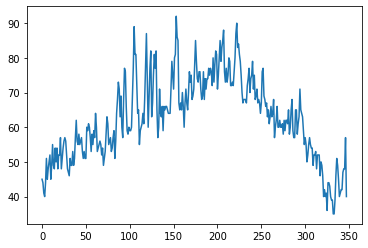

In [12]:
plt.plot(data['actual'])
plt.show()

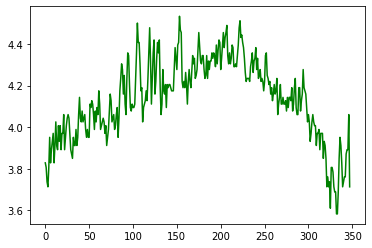

In [13]:
plt.plot(np.log1p(data['actual']),color='g')
plt.show()

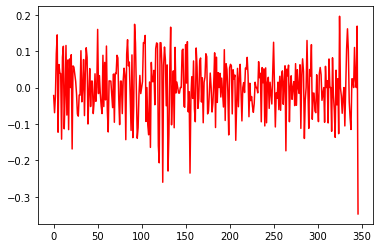

In [14]:
plt.plot(np.diff(np.log1p(data['actual'])), color='r')
plt.show()

로그 변환 후 차분을 진행하면 정상 시계열을 만족한다.

In [16]:
factor = data[['month', 'average','forecast_noaa','forecast_acc','actual']]

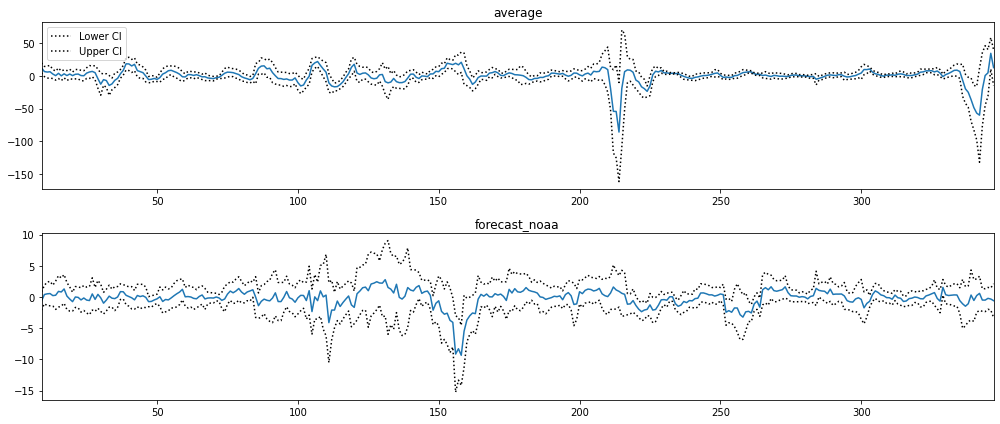

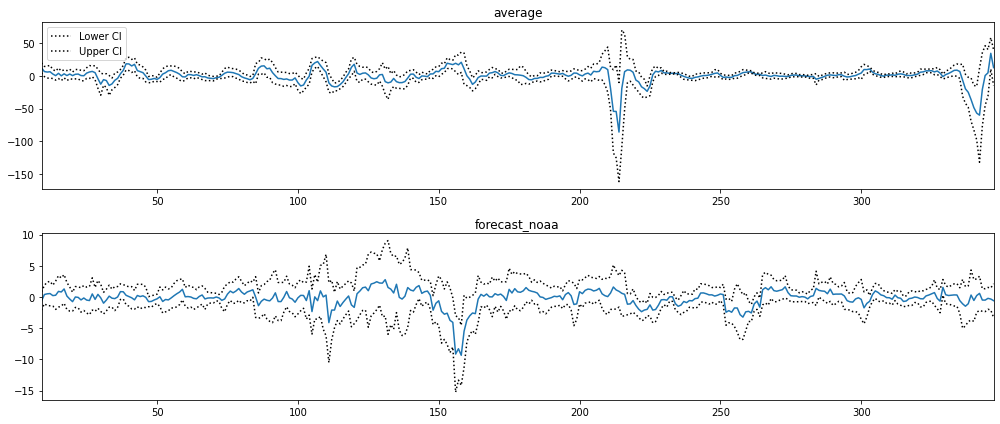

In [21]:
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm

factor = data[['average','forecast_noaa', 'forecast_acc']]
endog = data['actual'].astype('float64')
exog = sm.add_constant(factor)
rols = RollingOLS(endog, exog, window=10)
rres = rols.fit()
params = rres.params
rres.plot_recursive_coefficient(variables=factor.columns[:-1], figsize=(14,6))

이동평균법 사용시 뒤의 n개의 데이터를 예측하고 싶으면 window = n 적용

#### 자동 회귀 통합 모델(VAR)
- 여러 시계열 변수로 구성되며 예측에 매우 유용한 도구
- 자동 회귀(AR) 모형의 확장 버전

In [23]:
target = data[['average','forecast_noaa','forecast_acc','forecast_under','actual']]
target.index = data['datetime']
target.head()

,average,forecast_noaa,forecast_acc,forecast_under,actual
datetime,,,,,
2016-01-01,45.6,43,50,44,45
2016-01-02,45.7,41,50,44,44
2016-01-03,45.8,43,46,47,41
2016-01-04,45.9,44,48,46,40
2016-01-05,46.0,46,46,46,44


앞서 로그 변환 후 차분이 정상성을 만족했기 때문에 로그 변환 후, 1차 차분을 진행한다.

In [24]:
target['lagged_1'] = np.log(target.actual).diff()
target.dropna(inplace=True)

In [25]:
adfuller_test = adfuller(target['lagged_1'], autolag='AIC')
print("ADF test statistic : {}".format(adfuller_test[0]))
print('p-value : {}'.format(adfuller_test[1]))

ADF test statistic : -9.693536626514453
p-value : 1.119921388739465e-16


정상성을 만족하는 것을 확인

In [26]:
from statsmodels.tsa.api import VAR

train = target.iloc[:-31].drop('actual', axis=1)
test = target.iloc[-31:].drop('actual',axis=1)

In [27]:
forecasting_model = VAR(train)
results_aic = []

for p in range(1,10):
    results = forecasting_model.fit(p)
    results_aic.append(results.aic)

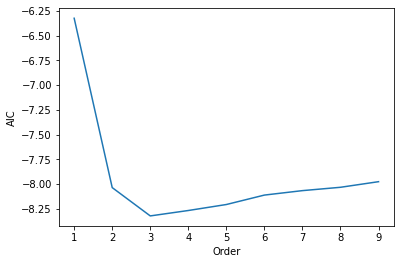

In [29]:
plt.plot(list(np.arange(1,10,1)), results_aic)
plt.xlabel('Order')
plt.ylabel('AIC')
plt.show()

AIC가 가장 낮을 때는 3이고, 그 이후 p가 커짐에 따라 증가 추세를 보인다. 따라서 VAR 모델의 최적 순서는 3으로 선택한다.

In [30]:
results = forecasting_model.fit(3)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 18, Aug, 2022
Time:                     16:32:55
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -7.36523
Nobs:                     313.000    HQIC:                  -7.94009
Log likelihood:          -838.132    FPE:                0.000243041
AIC:                     -8.32273    Det(Omega_mle):     0.000189418
--------------------------------------------------------------------
Results for equation average
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.040473         0.033973            1.191           0.234
L1.average                1.419638         0.048286           29.400           0.000
L1.forecast_noaa         -0.002015        

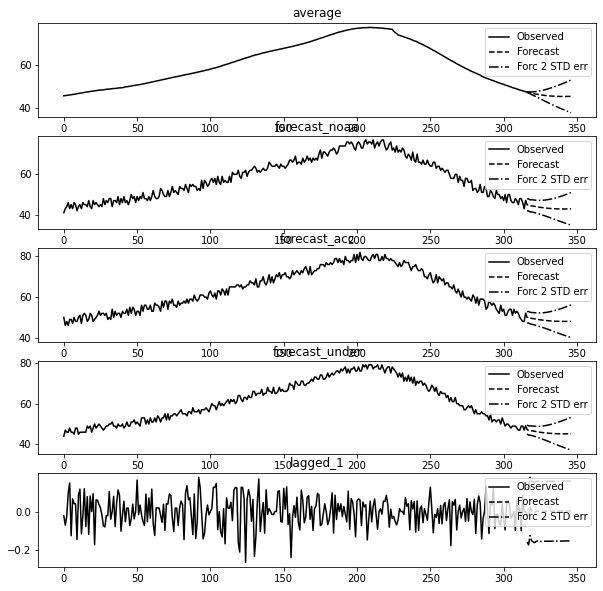

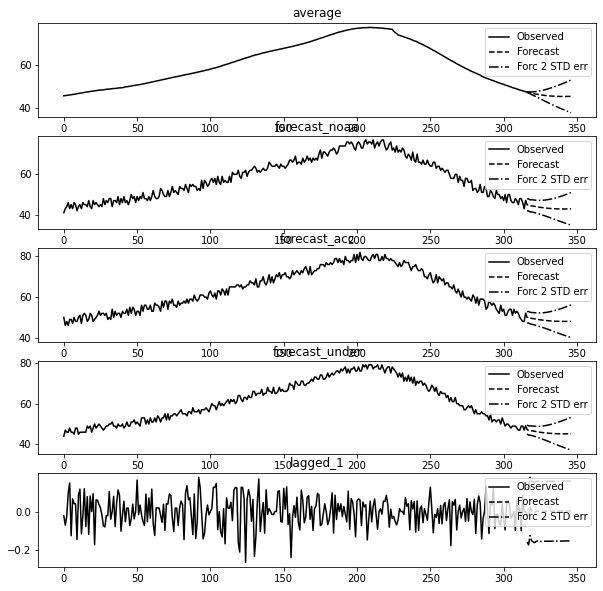

In [31]:
results.plot_forecast(31)

train 데이터로 한달 후 예측

In [32]:
lag_order = results.k_ar #lagging order 수
v = train.values[-lag_order:]
pred = results.forecast(y=v, steps=31)
forecast = pd.DataFrame(pred, index=test.index, columns=train.columns)
forecast.head()

,average,forecast_noaa,forecast_acc,forecast_under,lagged_1
datetime,,,,,
2016-12-01,47.405217,44.921039,49.921291,47.382679,-0.014312
2016-12-02,47.235349,44.864157,50.085233,46.813248,-0.025396
2016-12-03,47.072877,44.402843,49.679052,46.827501,0.025903
2016-12-04,46.920184,44.400988,49.519106,46.660918,0.003902
2016-12-05,46.770443,44.314340,49.433397,46.618064,-0.002353


In [33]:
exp_pred = np.exp(forecast.lagged_1.cumsum())

# 로그 변환했기 때문에 차분을 다시 복원 후 지수 변환 실행

In [35]:
forecast_error = [test['lagged_1'][i] - exp_pred[i] for i in range(len(test))]
bias = sum(forecast_error) * 1 / len(test)
print(f'Bias : {bias}%')

Bias : -1.0020918430764163%


실제 예측값 구하기

In [38]:
prediction = train.iloc[-1, -2] * exp_pred
print(f'RMSE = {np.sqrt(mean_squared_error(target.loc["2016-12-01":, "actual"], prediction))}')



RMSE = 7.1945285596839


### 지수 평활법
: 모든 시계열 자료를 사용하여 평균을 구하며, 시간의 흐름에 따라 최근 시계열에 더 많은 가중치를 부여하여 미래를 예측하는 방법

- 단기간에 발생하는 불규칙변동을 평활하는 방법
- 자료의 수가 많고 안정된 패턴을 보이는 경우 예측 품질이 높다
- 지수평활법에서 가중치의 역할은 지수 평활계수이며 불규칙변동이 큰 경우 시계열의 경우 지수평활계수는 작은 값을, 불규칙 변동이 작은 시계열의 경우 큰 값의 지수평활계수를 적용한다.
- 지수 평활계수는 과거로 갈수록 지속적으로 감소함
- 지수 평활법은 불규칙변동의 영향을 제거하는 효과가 있으며 중기 예측 이상에 주로 사용됨(단, 단순 지수 평활법은 장기 추세나 계절 변동이 포함된 시계열의 예측에는 적합하지 않음)

In [41]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
data = pd.read_csv('./data/Bike_sharing_demand.csv')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [42]:
data['datetime'] = pd.to_datetime(data['datetime'])
data = data[['datetime','count']]
data.set_index('datetime', inplace=True)
data.head()

,count
datetime,
2011-01-01 00:00:00,16
2011-01-01 01:00:00,40
2011-01-01 02:00:00,32
2011-01-01 03:00:00,13
2011-01-01 04:00:00,1


In [43]:
data = data.asfreq('H',method='ffill')

tr = data.iloc[:1000]
te = data.iloc[1000:1200]

### SimpleExpSmooting
#### inintalization_method
- estimated
- heuristic

In [48]:
fit1 = SimpleExpSmoothing(tr['count'], initialization_method='heuristic').fit(smoothing_level=0.2,optimized=False)
fit1 = SimpleExpSmoothing(tr['count'], initialization_method='heuristic').fit(smoothing_level=0.2, optimized=False)
forecast = fit1.forecast(len(te))

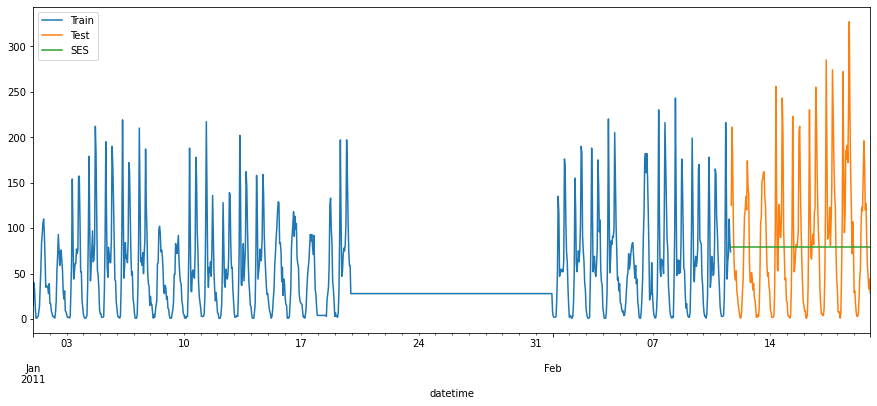

In [49]:
plt.figure(figsize=(15,6))
tr['count'].plot(label='Train')
te['count'].plot(label='Test')
forecast.plot(label='SES')

plt.legend()
plt.show()

In [50]:
rmse = np.sqrt(mean_squared_error(te, forecast))
rmse

71.39072696956178

#### Holt's Linear Trend Method

In [51]:
fit1 = Holt(np.array(tr['count'])).fit(smoothing_level=0.3, smoothing_slope=0.05)
forecast = fit1.forecast(len(te))

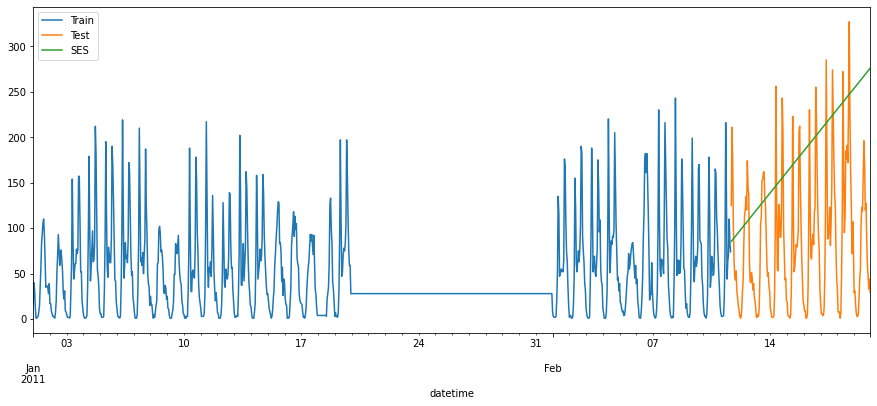

In [52]:
plt.figure(figsize=(15,6))
tr['count'].plot(label='Train')
te['count'].plot(label='Test')
pd.Series(forecast, index=te.index).plot(label='SES')
plt.legend()
plt.show()

In [53]:
rmse = np.sqrt(mean_squared_error(te, forecast))
rmse

127.02564632407716

### Holt-Winters Method

In [54]:
fit1 = ExponentialSmoothing(np.asarray(tr['count']), seasonal_periods= 24, seasonal='add').fit()

# 계절성 보이면 seasonal = 'add' 추가

In [55]:
forecast = fit1.forecast(len(te))

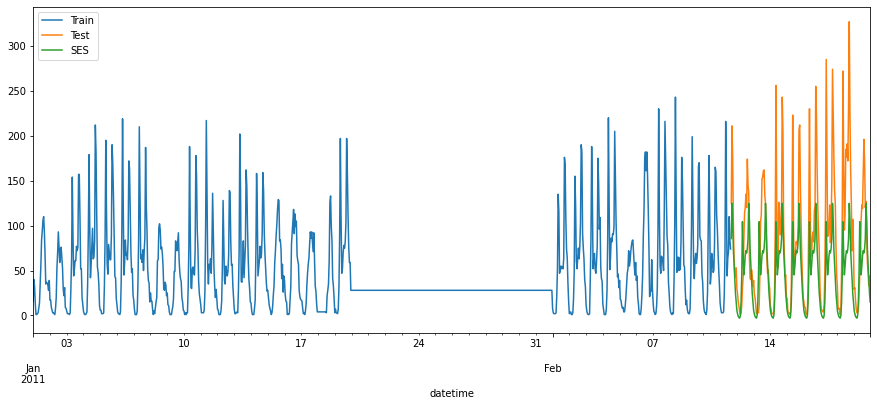

In [56]:
plt.figure(figsize=(15,6))
tr['count'].plot(label='Train')
te['count'].plot(label='Test')
pd.Series(forecast, index=te.index).plot(label='SES')
plt.legend()
plt.show()

### 시계열 모형
#### 자기 회귀 모형(AR 모형 / AutoRegressive Model)
- p시점 전의 자료가 현재 자료에 영향을 주는 모형
- 자기상관함수(ACF)는 빠르게 감소하고 부분자기함수(PACF)는 어느 시점에서 절단점을 가진다. ACF가 빠르게 감소하고, PACF가 n시점에서 절단점을 갖는 그래프가 있다면, n-1시점의 자료까지가 현재에 영향을 미치는 AR(n-1) 모형이라고 볼 수 있다.

#### 이동평균모형(MA 모형 / Moving Average Model)
- 유한한 개수의 백색잡음의 결합이므로 언제나 정상성을 만족
- 1차 이동평균 모형(MA1 모형)은 이동평균모형 중에서 가장 간단한 모형으로 시계열이 같은 시점의 백색잡음과 바로 전 시점의 백색잡음의 결합으로 이루어진 모형
- 2차 이동평균 모형(MA2 모형)은 바로 전 시점의 백색잡음과 시차가 2인 백색잡음의 결합으로 이루어진 모형 
- AR 모형과 반대로 ACF에서 절단점을 가지고 PACF가 빠르게 감소함

#### 자기회귀누적이동평균모형 (ARIMA(p,d,q) 모형 / AutoRegressive Integrated Moving Average Model)
- ARIMA 모형은 비정상 시계열 모형이다.
- 차분이나 변환을 통해 AR모형, MA 모형, 이둘을 합친 ARIMA 모형으로 정상화할 수 있다.
- p는 AR 모형, q는 MA 모형과 관련이 있는 차수이다.
- 시계열 (Zt)의 d번 차분한 시계열이 ARIMA(p,q)모형이면, 시계열 (Zt)는 차수가 p,d,q인 ARIMA 모형, 즉 ARIMA(p,d,q) 모형을 갖는다고 한다.
- d = 0인 경우, ARIMA(p,q) 모형이라 부르고 이 모형은 정상성을 만족한다.
- p = 0인 경우, IMA(d,q) 모형이라 부르고 d번 차분하면 MA(q) 모형을 따른다.
- q = 0인 경우, ARI(p,d) 모형이라 부르고 d번 차분하면 AR(p) 모형을 따른다.
- acf, pacf를 통해 정상성을 확인할 수도 있지만, adf 검정을 통해 확인할 수 있다.
- ARIMA(0,1,1)인 경우 1차분 후 MA(1) 활용
- ARIMA(1,1,0)인 경우 1차분 후 AR(1) 활용
- ARIMA(1,1,2)인 경우 1차분후 AR(1), MA(2), ARIMA(1,2)중 선택 활용 : 이경우 가장 간단한 모형을 선택하거나, AIC를 적용하여 점수가 가장 낮은 모형을 선택한다.

#### AR(p) = ARIMA(p,0,0)
#### MA(q) = ARIMA(0,0,q)
#### ARIMA(p,q) = ARIMA(p,0,q)

ARIMA의 모수는 크게 3가지가 있다. AR모형의 Lag를 의미하는 p, MA모형의 Lag를 의미하는 q, 차분 횟수를 의미하는 d
- 통상적으로 p+q < 2, p*q=0인 값들을 많이 사용한다.

#### 분해 시계열
- 시계열에 영향을 주는 일반적인 요인을 시계열에서 분리해 해석하는 방법으로 회귀분석적인 방법을 주로 사용한다.
- 분해식의 일반적 정의 : Zt = f(Tt, St, Ct, It)

### 정상시계열 판단 방법
#### 1) ACF & PACF 그래프 이용
ACF(Auto Correlation function)
- 자기 상관은 관측치 간의 시간지연 함수로서 관측치간의 유사성을 의미한다.
- Lag에 따른 관측치들 사이의 관련성을 측정하는 함수
- 플롯이 사인 함수 처럼 생겼는지 살펴봐야 한다. 이러한 패턴은 시계열의 계절성에 대한 힌트이며 반복되는 패턴을 확인할 수 있다. 

PACF(Partial Autocorrelation function)
- k 이외의 모든 다른 시점 관측치의 영향력을 배제하고 yt와 yt-k 두 관측치의 관련성을 측정하는 함수

파란색 신뢰수준 안에 막대가 들어오는지 여부를 살펴봐야 하기 때문에 시각적인 판단에 의존해야 한다. 따라서 통계적 검정 방법을 지향한다.

#### 2) 통계적 검정
ADF검정
- ADF는 시계열의 안정성 여부를 확인하는 데 이용된다.
- 귀무가설 : 시계열이 안정적이지 않다.
- 대립가설 : 시계열이 안정적이다.

<입력인수>
- x : 시계열 자료
- maxlag : ADF 검정에 사용할 시차의 수. 디폴트 12
- regression : 검정 사용할 모형
- 'nc' : 결정론적 추세 없음. DF 검정
- 'c' : 상수항만 사용
- 'ct' : 상수항과 1차 추세 사용
- 'ctt' : 상수항과 1차 추세, 2차 추세 사용
- autolog : 검정 AR 모형의 차수를 자동 결정하는 알고리즘 {'AIC', 'BIC', 't-stat', None}

<반환값>
- adf : 검정 통계량
- p-value : MacKinnon 방식을 사용한 p-value 추정치
- usediag : 사용된 시차의 수
- nobs : 분석에 자료의 수
- critical values : 1%, 5%, 10% 수준에 해당되는 검정 통계량의 값
- p < 0.05인 경우 : 데이터가 고정되어 있음
- p >0.05 인 경우 : 데이터가 고정되어 있지 않음, p 값이 클 수록 특정 추세(다양한 평균) 또는 계절성이 있음을 나타냄

KPSS 안정성 테스트 
- 시계열이 평균 또는 선형 추세 주변에 고정되어 있는 지 또는 단위 루트로 인해 고정되지 않은 지 확인
- 원 데이터에 적용하는 방법
- 귀무가설 : 시계열이 안정적이다.
- 대립가설 : 시계열이 안정적이지 않음

Ljung-Box Q 방법
- 잔차 검정에 적용하는 방법
- 귀무가설 : 해당 데이터의 잔차들이 자기 상관성이 없다.
- 대립가설 : 해당 데이터의 잔차들이 자기 상관성이 있다.
- 만약 잔차들이 자기 상관성이 없다면 원데이터가 정상성을 만족하는 것이다.